In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
df_train_txt = pd.read_csv("/Users/Antoine/Documents/DATACAMP/msk-redefining-cancer-treatment/training_text", sep='\|\|', header=None, skiprows=1, names=["ID","Text"])
df_train_txt.head()

C:\Users\Antoine\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [3]:
df_train_var = pd.read_csv("/Users/Antoine/Documents/DATACAMP/msk-redefining-cancer-treatment/training_variants")
df_train_var.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [4]:
df_test_txt = pd.read_csv("/Users/Antoine/Documents/DATACAMP/msk-redefining-cancer-treatment/test_text", sep='\|\|', header=None, skiprows=1, names=["ID","Text"])
df_test_txt.head()

C:\Users\Antoine\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,ID,Text
0,0,2. This mutation resulted in a myeloproliferat...
1,1,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,Vascular endothelial growth factor receptor (V...
3,3,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,Abstract Retinoblastoma is a pediatric retina...


In [5]:
df_test_var = pd.read_csv("/Users/Antoine/Documents/DATACAMP/msk-redefining-cancer-treatment/test_variants")
df_test_var.head()

,ID,Gene,Variation
0,0,ACSL4,R570S
1,1,NAGLU,P521L
2,2,PAH,L333F
3,3,ING1,A148D
4,4,TMEM216,G77A


In [6]:
df_train = pd.merge(df_train_var, df_train_txt, how='left', on='ID')
df_train.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [7]:
df_test = pd.merge(df_test_var, df_test_txt, how='left', on='ID')
df_test.head()

,ID,Gene,Variation,Text
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...


# Data Exploration
First we can look at some basic statistic on Class

In [8]:
df_train.describe()

,ID,Class
count,3321.000000,3321.000000
mean,1660.000000,4.365854
std,958.834449,2.309781
min,0.000000,1.000000
25%,830.000000,2.000000
50%,1660.000000,4.000000
75%,2490.000000,7.000000
max,3320.000000,9.000000


In [9]:
df_train["Class"].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

We got 9 different classes. We can now plot the frequencies of each class.

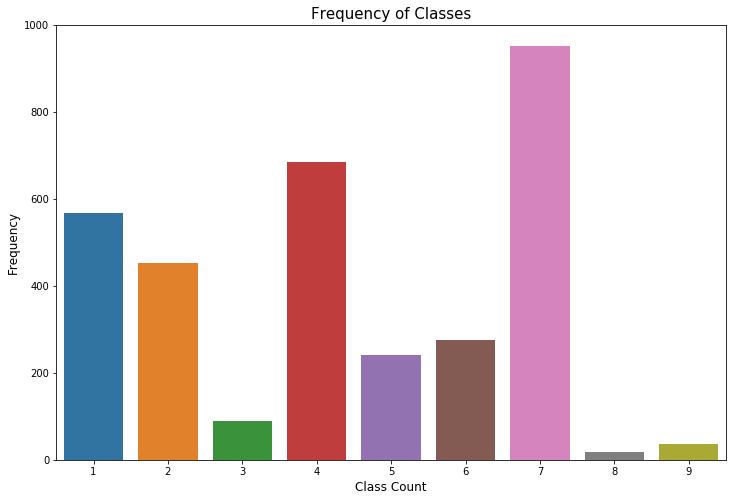

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x="Class", data=df_train)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Class Count', fontsize=12)
plt.xticks()
plt.title("Frequency of Classes", fontsize=15)
plt.show()

We will now work on the text, we have decided to count the number of words and characters for each line of the dataset.

In [14]:
# Words & characters
df_train["Text_num_words"] = df_train["Text"].apply(lambda x: len(str(x).split()) )
df_train["Text_num_chars"] = df_train["Text"].apply(lambda x: len(str(x)) )

df_test["Text_num_words"] = df_test["Text"].apply(lambda x: len(str(x).split()) )
df_test["Text_num_chars"] = df_test["Text"].apply(lambda x: len(str(x)) )

df_train.head()
df_test.head()

,ID,Gene,Variation,Text,Text_num_words,Text_num_chars
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...,7417,49925
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...,4706,31460
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...,11080,75419
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...,8376,54100
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...,11159,77127


Now that we got the column "Text_num_words" with the number of words and "Text_num_chars" for the numbe or characters we can display the histograms.

## Histograms

C:\Users\Antoine\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


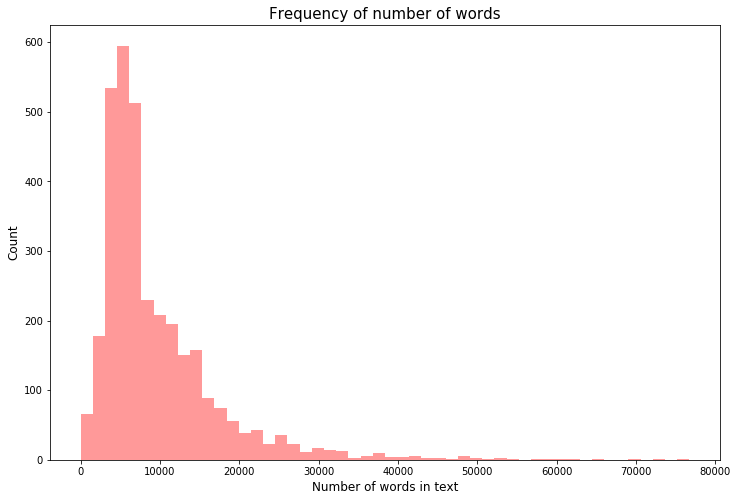

In [15]:
plt.figure(figsize=(12, 8))
sns.distplot(df_train.Text_num_words.values, bins=50, kde=False, color='red')
plt.xlabel('Number of words in text', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Frequency of number of words", fontsize=15)
plt.show()

C:\Users\Antoine\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


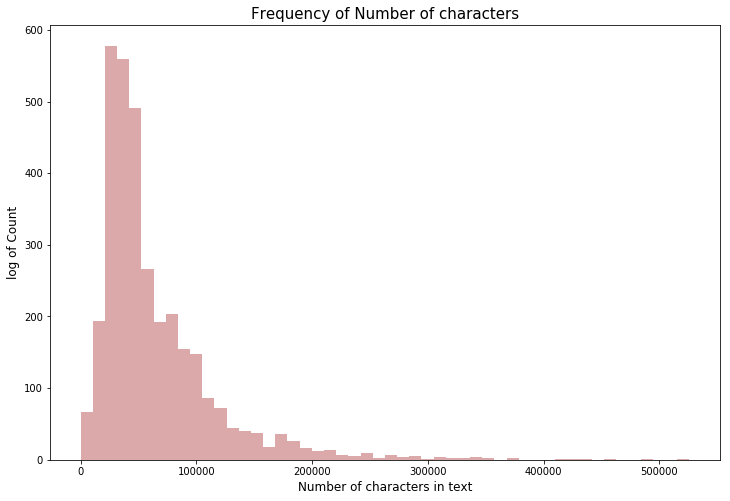

In [76]:
plt.figure(figsize=(12, 8))
sns.distplot(df_train.Text_num_chars.values, bins=50, kde=False, color='brown')
plt.xlabel('Number of characters in text', fontsize=12)
plt.ylabel('log of Count', fontsize=12)
plt.title("Frequency of Number of characters", fontsize=15)
plt.show()

## Boxplots

Maybe there is a first simple model based on the number of words/characters so for each class 
let's display the boxplots of the number of words/characs.

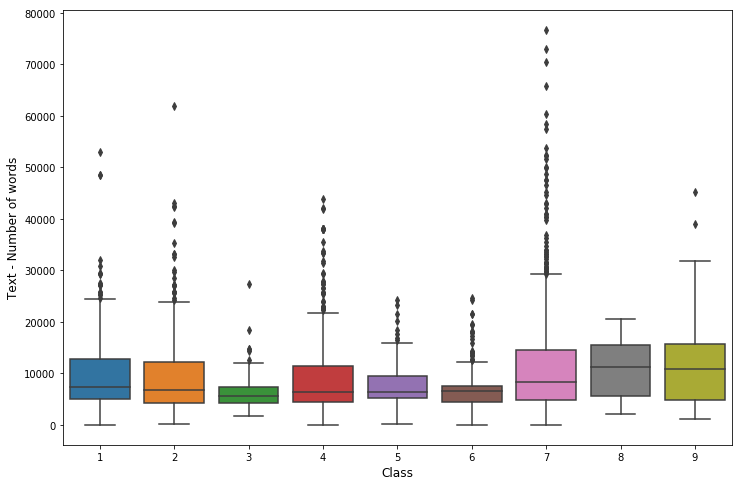

In [77]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Class', y='Text_num_words', data=df_train)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Text - Number of words', fontsize=12)
plt.show()

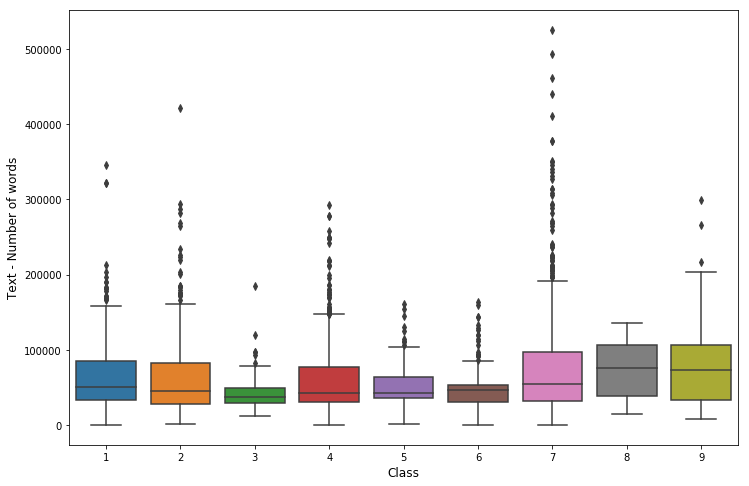

In [78]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Class', y='Text_num_chars', data=df_train)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Text - Number of words', fontsize=12)
plt.show()

# First model

Our first model will be based on the number of words/characters.

In [19]:
df_train.head()

,ID,Gene,Variation,Class,Text,Text_num_words,Text_num_chars
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...,6089,39765
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...,5722,36831
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...,5722,36831
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...,5572,36308
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...,6202,41427


In [79]:
df_test.head()

,ID,Gene,Variation,Text,Text_num_words,Text_num_chars,Class
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...,7417,49925,0
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...,4706,31460,0
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...,11080,75419,0
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...,8376,54100,0
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...,11159,77127,0


We isolated the number of words and characters and we stored in X while in y there is the class

In [80]:
X_train = df_train[["Text_num_words","Text_num_chars"]]
y_train = df_train[["Class"]]
X_test = df_test[["Text_num_words", "Text_num_chars"]]
y_test = df_test[["Class"]]

## Bagging

In [45]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()
bagging.fit(X_train, y_train)

C:\Users\Antoine\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [46]:
bagging.score(X_train, y_train)

0.8747365251430292

Kaggle have decided to use the Log Loss

In [48]:
log_loss(y_train, bagging.predict_proba(X_train))

0.3926892675353636

Now, we can create a dataset that will be converted into a CSV file and directly uploaded on Kaggle.

In [74]:
r = bagging.predict_proba(X_test)

d = {'ID': df_test["ID"], 'class1': r[:,0], 'class2': r[:,1], 'class3': r[:,2], 'class4': r[:,3], 'class5': r[:,4]
    , 'class6': r[:,5], 'class7': r[:,6], 'class8': r[:,7], 'class9': r[:,8]}

df_res = pd.DataFrame(data=d)
submit = df_res.iloc[1:987,]
submit.head()

,ID,class1,class2,class3,class4,class5,class6,class7,class8,class9
1,1,0.687500,0.1,0.0,0.0125,0.000000,0.000000,0.2,0.0,0.0
2,2,0.000000,0.1,0.0,0.1000,0.000000,0.000000,0.8,0.0,0.0
3,3,0.035714,0.0,0.0,0.1000,0.428571,0.035714,0.4,0.0,0.0
4,4,0.100000,0.0,0.0,0.1000,0.000000,0.000000,0.8,0.0,0.0
5,5,0.221667,0.1,0.0,0.0000,0.478333,0.000000,0.2,0.0,0.0


In [75]:
submit.to_csv('out.csv', index = False) #import into CSV